<a href="https://colab.research.google.com/github/kimiafazli/customer-segmentation/blob/main/customer_segmentation_OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation for Online Retail store**
Prepared by

Kimia Fazli Garmestani

Supervisor

Professor Mehdi Seyf-Barghi

#Use Case
*  Use Case Summary

*  Objective Statement:

 *  Get business insight about how many product sold every month.
 *  Get business insight about how much customer spend their money every month.
 *  To reduce risk in deciding where, when, how, and to whom a product, service, or brand will be marketed.
 *  To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.
*  Challenges:

 *  Large size of data, can not maintain by excel spreadsheet.
 *  Need several coordination from each department.
 *  Demography data have a lot missing values and typo.
*  Methodology / Analytic Technique:

 *  Descriptive analysis
 *  Graph analysis
 *  Segment Analysis
*  Business Benefit:

 *  Helping Business Development Team to create product differentiation based on the characteristic for each customer.
 *  Know how to treat customer with specific criteria.
*  Expected Outcome:

 *  Know how many product sold every month.
 *  Know how much customer spend their money every month.
 *  Customer segmentation analysis.
 *  Recommendation based on customer segmentation.
#Business Understanding
*  Retail is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit.
*  This case has some business question using the data:
*  How many product sold every month?
*  How much customer spend their money every month?
*  How about Customer segmentation analysis?
*  How about recommendation based on customer segmentation?
#Data Understanding
*  Data of Retail Transaction from 01 December 2010 to 09 December 2011
*  Source Data: Online retail dataset by UCI Machine Learning Library.
https://archive.ics.uci.edu/ml/datasets/Online+Retail


*  Data Dictionary:
*  InvoiceNo: Invoice number uniquely assigned to each transaction.
*  StockCode: Product (item) code.
*  Description: Product (item) name.
*  Quantity: The quantities of each product (item) per transaction.
*  InvoiceDate: The day and time when each transaction was generated.
*  UnitPrice: Product price per unit in sterling.
*  CustomerID: Customer number uniquely assigned to each customer.
*  Country: The name of the country where each customer resides.
#Data preparation
*  Code Used:
*  Python Version: 3.7.6
*  Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and Feature Engine

#**Importing Library**

In [ ]:
! pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

#**Import the Dataset**

In [ ]:
df = pd.read_csv("OnlineRetail.csv",  encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#**Data Prepartion**

**Pre-Processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by customers or bad-debt incurred by the business.
Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.
We need to clean the above values by removing from the dataset.

**The UnitPrice contains negative values which Should be removed due to the possibility of representing cancelled orders by customers or bad-debt incurred by the business as these do not represent actual sales.**

In [ ]:
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]

**Duplicate Data**

In [ ]:
df.duplicated().sum()

5226

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Missing Values**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [ ]:
df = df[pd.notnull(df['CustomerID'])]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(392692, 8)

In [ ]:
#Country
df.Country.value_counts(normalize=True)

United Kingdom          0.889254
Germany                 0.022982
France                  0.021202
EIRE                    0.018401
Spain                   0.006313
Netherlands             0.006007
Belgium                 0.005172
Switzerland             0.004688
Portugal                0.003700
Australia               0.003007
Norway                  0.002727
Italy                   0.001930
Channel Islands         0.001902
Finland                 0.001744
Cyprus                  0.001536
Sweden                  0.001146
Austria                 0.001014
Denmark                 0.000968
Poland                  0.000840
Japan                   0.000817
Israel                  0.000624
Unspecified             0.000614
Singapore               0.000565
Iceland                 0.000463
USA                     0.000456
Canada                  0.000385
Greece                  0.000369
Malta                   0.000285
United Arab Emirates    0.000173
European Community      0.000153
RSA       

Text(0.5, 0, 'country')

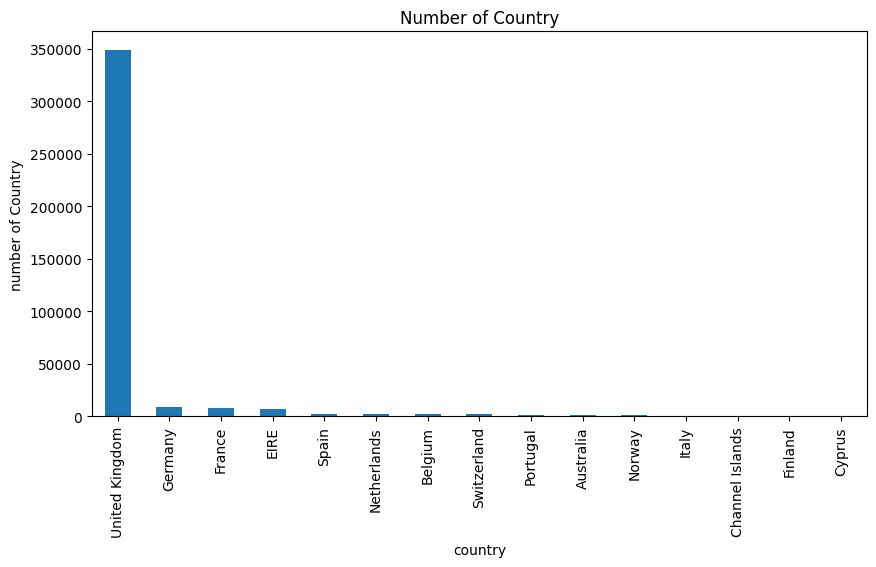

In [ ]:
df.Country.value_counts().nlargest(15).plot(kind="bar",figsize=(10,5))
plt.title("Number of Country")
plt.ylabel("number of Country")
plt.xlabel("country")

In [ ]:
df = df[df.Country == 'United Kingdom']

# **Exploratory Data Analysis**


How many product sold every month?

In [ ]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [ ]:
#CustomerID

df = df[pd.notnull(df['CustomerID'])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         349203 non-null  object        
 1   StockCode         349203 non-null  object        
 2   Description       349203 non-null  object        
 3   Quantity          349203 non-null  int64         
 4   InvoiceDate       349203 non-null  datetime64[ns]
 5   UnitPrice         349203 non-null  float64       
 6   CustomerID        349203 non-null  float64       
 7   Country           349203 non-null  object        
 8   InvoiceYearMonth  349203 non-null  int64         
 9   Date              349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 29.3+ MB


In [ ]:
#Aggregating the Orders by Month and converting series to dataframe and resetting index.

df_agg= df.groupby("Date").Quantity.sum()
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Date,Quantity
0,2010-12,266573
1,2011-01,277650
2,2011-02,212792
3,2011-03,275385
4,2011-04,259592


In [ ]:
plot_data = [
    go.Scatter(x=df_agg['Date'], y=df_agg['Quantity'], mode='lines+markers')]

plot_layout = go.Layout( xaxis={"type": "category"}, title='Orders in late 2010 and 2011')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         349203 non-null  object        
 1   StockCode         349203 non-null  object        
 2   Description       349203 non-null  object        
 3   Quantity          349203 non-null  int64         
 4   InvoiceDate       349203 non-null  datetime64[ns]
 5   UnitPrice         349203 non-null  float64       
 6   CustomerID        349203 non-null  float64       
 7   Country           349203 non-null  object        
 8   InvoiceYearMonth  349203 non-null  int64         
 9   Date              349203 non-null  object        
 10  Revenue           349203 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 32.0+ MB


In [ ]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,496477.340
1,201101,440876.330
2,201102,354618.200
3,201103,465784.190
4,201104,408733.111


In [ ]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#**RFM Analysis**
**RFM Metrics**

  Recency Frequency Monetary (RFM)

*  Recency — how long it’s been since a customer bought something from us.

*  Frequency — how often a customer buys from us.

*  Monetary value — the total value of purchases a customer has made.

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

we are going to perform following opertaions:

-For Recency, Calculate the number of days between present date and date of last purchase each customer.

-For Frequency, Calculate the number of orders for each customer.

-For Monetary, Calculate sum of purchase price for each customer.

In [ ]:
NOW = dt.date(2011,12,9)
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [ ]:
#Recency
df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [ ]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4412,33053.19
12749.0,199,4090.88
12820.0,59,942.34


In [ ]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
(NOW - dt.date(2011,1,18)).days == 325

True

#**Modeling Data: RFM Quantiles**

We split the metrics into segments using quantiles by assigning a score from 1 to 4 to each Recency, Frequency and Monetary respectively. (1 is the highest value, and 4 is the lowest value.)

A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [ ]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4412,33053.19,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile



In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4412,33053.19,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4412,33053.19,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [ ]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  407
Loyal Customers:  969
Big Spenders:  980
Almost Lost:  22
Lost Customers:  166
Lost Cheap Customers:  343


In [ ]:
segmented_rfm['RFM_Score'].unique()

array([ 9,  3,  5, 12,  7,  8,  6, 10, 11,  4])

In [ ]:
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3             6.6     360.5   8254.6   407
4            20.1     182.3   3434.5   348
5            32.3     111.1   1914.7   387
6            46.9      77.7   1792.5   377
7            60.1      54.5    906.4   413
8            78.6      38.4    734.1   387
9            97.2      28.2    825.2   426
10          151.4      20.5    354.7   471
11          175.4      13.6    233.5   361
12          258.1       8.1    151.9   343

#**Modeling Data: K-Means Clustering**

K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [ ]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [ ]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4412,33053.19
3,3,199,4090.88
4,3,59,942.34


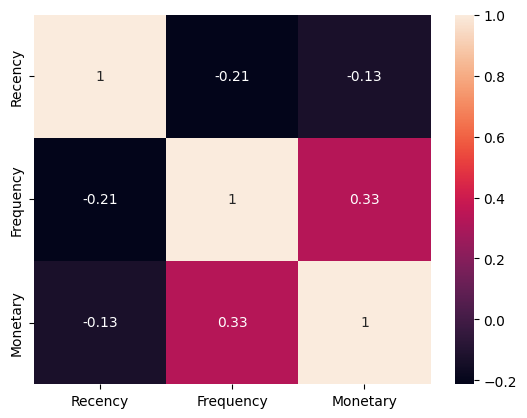

In [ ]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);


In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.244516494686479, : SkewtestResult(statistic=25.283720058978158, pvalue=4.8246481722257944e-141)
Frequency's: Skew: 18.558662048077977, : SkewtestResult(statistic=79.98758057918856, pvalue=0.0)
Monetary's: Skew: 20.20984381860587, : SkewtestResult(statistic=81.77329593066213, pvalue=0.0)


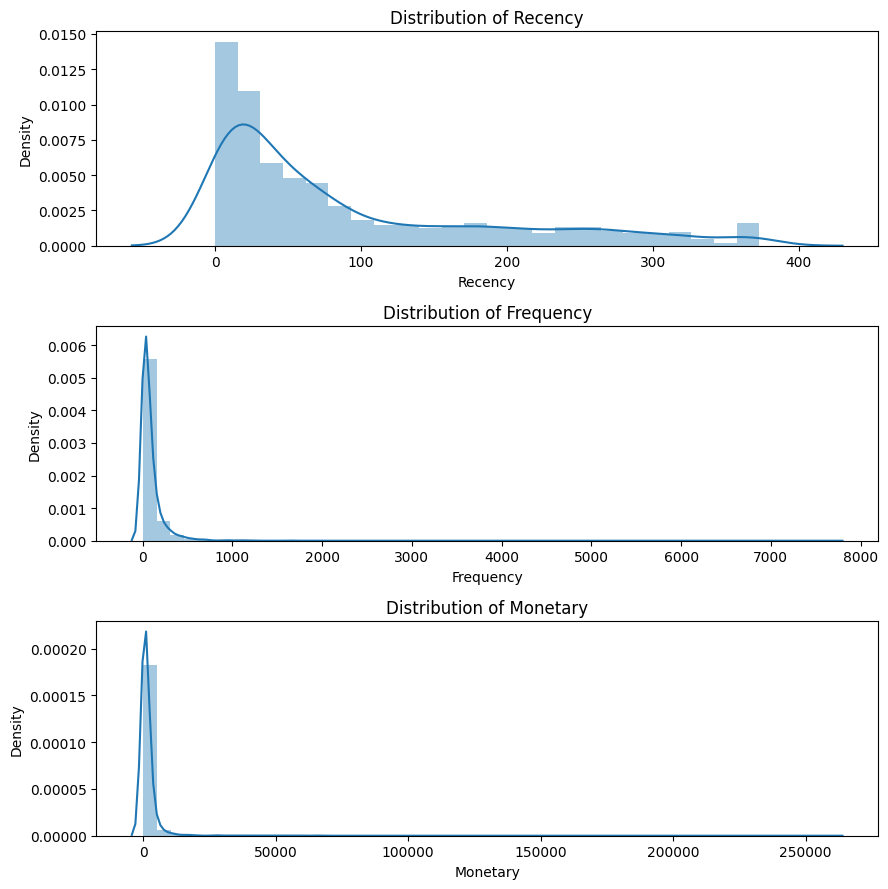

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(RFM_Table,'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_Table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_Table,'Monetary')

plt.tight_layout()

*  K-means gives the best result under the following conditions:

*  Data’s distribution is not skewed.
*  Data is standardised.

As we can see, data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [ ]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4412,33053.19
3,3,199,4090.88
4,3,59,942.34


In [ ]:
df_rfm_log = np.log(df_rfm_log+1)

Recency's: Skew: -1.3940258451054786, : SkewtestResult(statistic=-27.30375848085285, pvalue=3.8274126271098926e-164)
Frequency's: Skew: -0.9172765560337894, : SkewtestResult(statistic=-20.212221354690012, pvalue=7.642965247068133e-91)
Monetary's: Skew: -0.2825180180000623, : SkewtestResult(statistic=-7.098663938222145, pvalue=1.2596870210957422e-12)


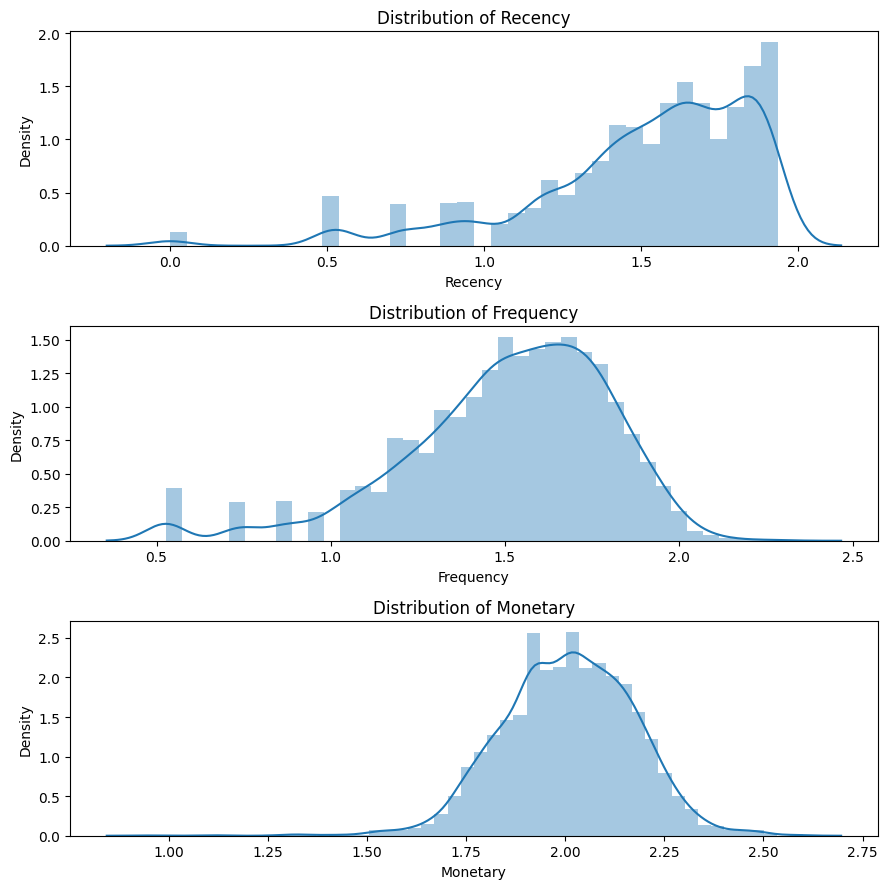

In [ ]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [ ]:
RFM_Table.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.742092,89.082398,1858.424654
std,1576.594671,99.533485,214.034542,7478.631256
min,12346.000000,0.000000,1.000000,3.750000
25%,14208.750000,17.000000,17.000000,298.185000
50%,15569.500000,50.000000,40.000000,644.975000
75%,16913.250000,142.000000,98.000000,1571.285000
max,18287.000000,373.000000,7676.000000,259657.300000


Once the skewness is reduced, I standardised the data by centring and scaling. Note all the variables now have a mean of 0 and a standard deviation of 1.

In [ ]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [ ]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [ ]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [ ]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,Recency,Frequency,Monetary
0,1.243640,-2.238865,2.124321
1,-2.314745,0.784982,1.449801
2,-2.314745,2.165995,2.124321
3,-2.131826,1.193247,1.432418
4,-2.131826,0.403119,0.336841


Finding the optimal number of clusters

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled)
    kmeanModel.fit(RFM_Table_scaled)

    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_,
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

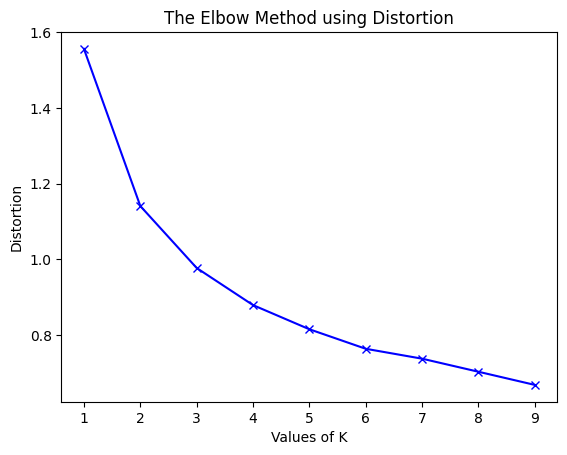

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new


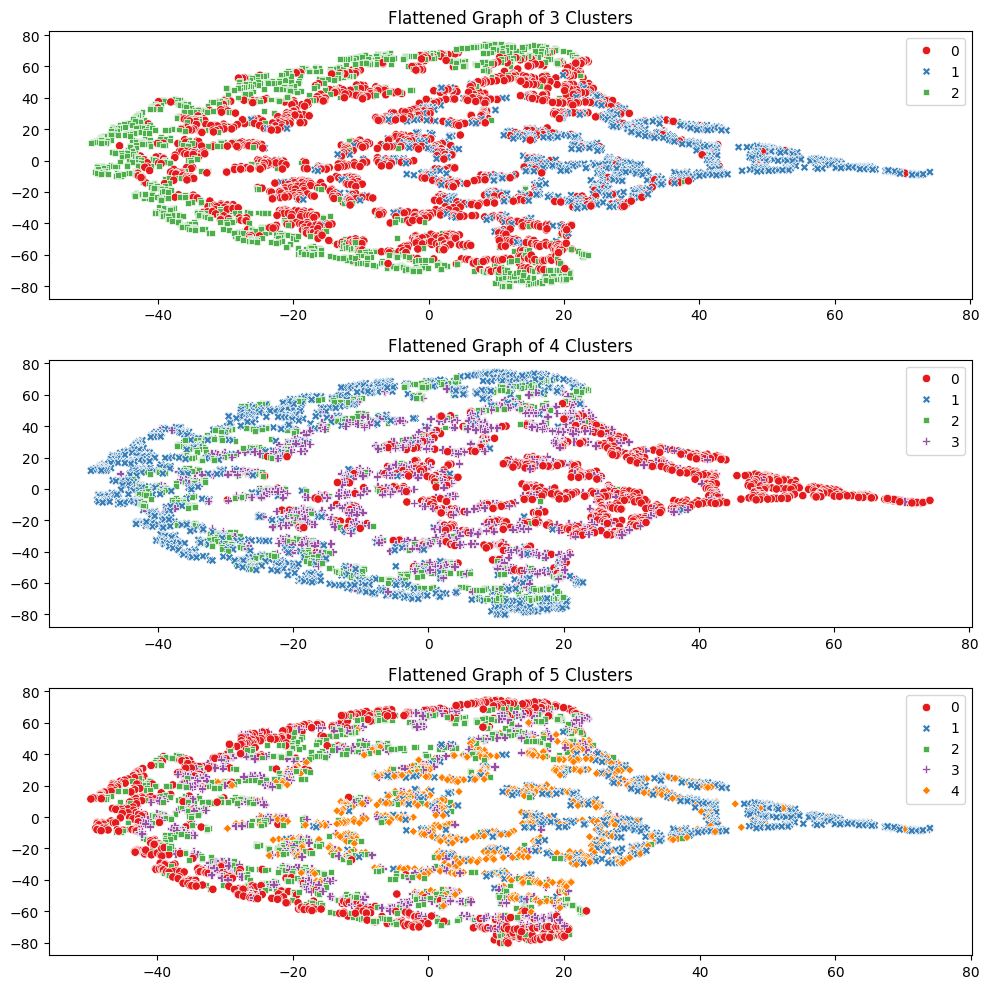

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=RFM_Table.index,
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

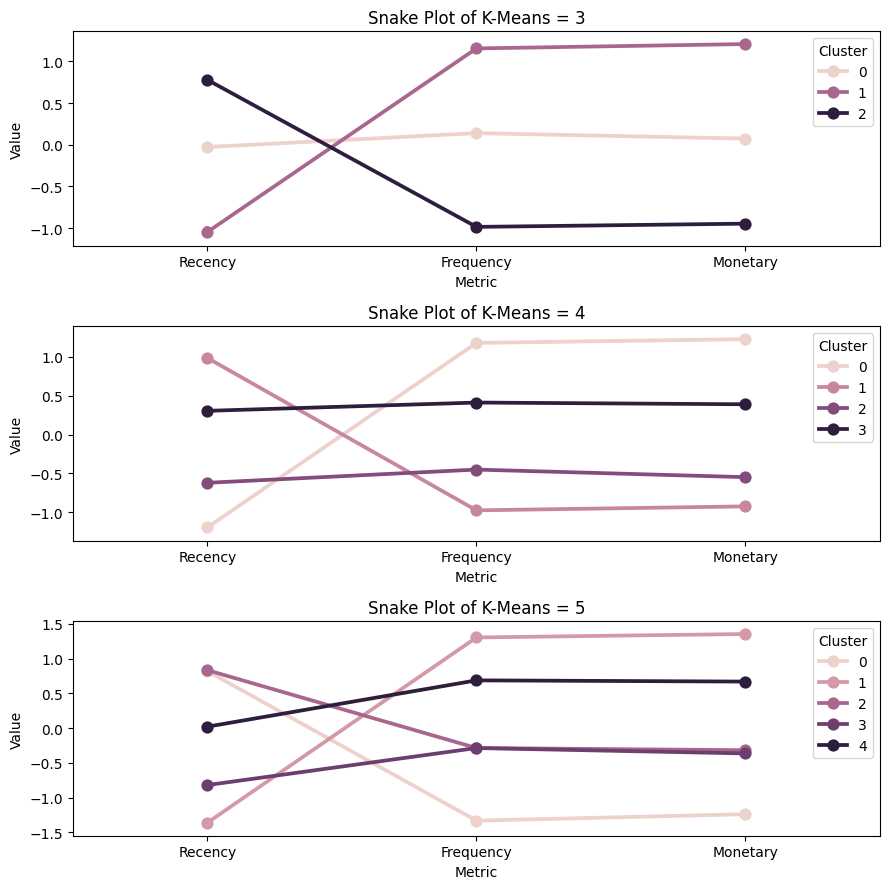

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

#**Evaluating Model: K-Means Clustering**

Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster.

K-Means = 3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

1.1172947218815317


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0639438173090343


K-Means = 5

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


KMeans(n_clusters=5)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0705566714007886


In [ ]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new


In [ ]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,3
1,12747.0,2,103,4196.01,0
2,12748.0,0,4412,33053.19,0
3,12749.0,3,199,4090.88,0
4,12820.0,3,59,942.34,0


In [ ]:
df_rfm_k4.Cluster.value_counts()

1    1162
3    1139
0     853
2     766
Name: Cluster, dtype: int64

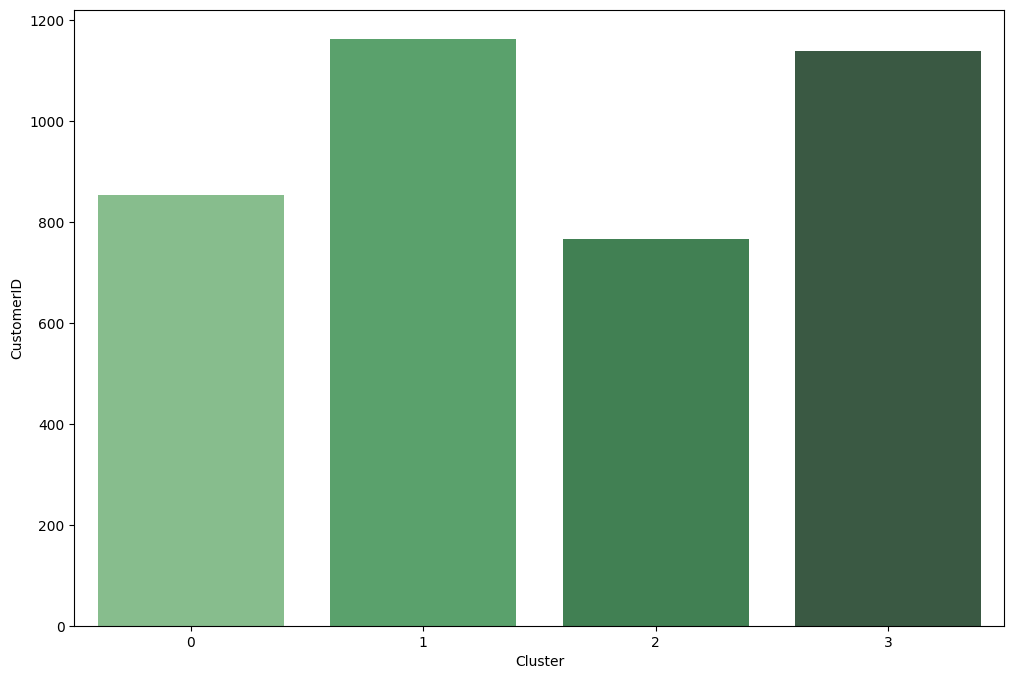

In [ ]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

Interpretation of the clusters formed using k-means.

In [ ]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [ ]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          12.0     256.0   5813.0   853
1         198.0      15.0    293.0  1162
2          25.0      29.0    450.0   766
3          88.0      80.0   1440.0  1139

*  "Cluster 0" has 29% customers. It belongs to the "Loyal Customers" segment as they Haven’t purchased for some time, but used to purchase frequently (F=2) and spent a lot. (R=3, F=2, M=2)

*  "Cluster 1" has 20% customers. It can be interpreted as "Alomost Lost". They purchase recently (R=2). However they do not purchase frequently and do not spent a lot. (R=2, F=3, M=3)

*  "Cluster 2" has 30% customers. It can be interpreted as "Lost Cheap Customers". Their last purchase is long ago (R=4), purchased very few (F=4) and spent little (M=4). (R=4, F=4, M=4)

*  "Cluster 3" has 21% customers. It belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1). (R=1, F=1, M=1)